# Fallen Meteorite Classification

The Meteoritical Society collects data on meteorites that have fallen to Earth. We use a dataset that is a record
of over 45,000 meteorites that have been collected or seen fallen and collected. For each meteorite, we know it's 
given name, classification, location, mass, and collection year. The distribution of meteoritic flux on on earth 
is largely uniform with a slight tendency towards the equator. However with then percentage of actual meteorites
found, we can assume an even distirbution of fallen meteorites over the globe. However, there is a large human 
collection bias that is associated with the ease of locating meteorites and the recognition of meteorite classes.We
will explore different features that might affect the finding of certain meteorite classes and try to predict what 
class of meteorites are found in different geographic locations.


## Load Python Libraries and Dataset

In [1]:
# pip install country-bounding-boxes

import numpy as np # linear algebra
from numpy import genfromtxt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import geopandas as gpd
from shapely.geometry import shape
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sb
from sklearn import preprocessing
from geopy.distance import geodesic
from scipy.spatial import cKDTree

import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")
from mpl_toolkits.basemap import Basemap
#from geopy.geocoders import Nominatim
#geolocator = Nominatim(user_agent="geoapiExercises")
    
df = pd.read_csv('meteorite-landings.csv')
df.count()

/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


name           45716
id             45716
nametype       45716
recclass       45716
mass           45585
fall           45716
year           45428
reclat         38401
reclong        38401
GeoLocation    38401
dtype: int64

## Grouping all meteorites into Classes

Using a traditional classification scheme (https://en.wikipedia.org/wiki/Meteorite_classification), all the different
meteorites were group into eight classes were most would share similar attributes. It must me noted that the 
Primitive, Asteroidal, Lunar, Martain Achondrites Meteorites group PALM is a grouping of meteorites from differing 
bodies and will not have similar compositions

In [2]:
# Primitive, Asteroidal, Lunar, Martain Achondrites Meteorites
df.recclass.replace(to_replace=['Acapulcoite', 'Acapulcoite/Lodranite', 'Acapulcoite/lodranite',
           'Lodranite','Lodranite-an','Winonaite','Achondrite-prim','Lunar','Lunar (anorth)', 'Lunar (bas. breccia)',
           'Lunar (bas/anor)', 'Lunar (bas/gab brec)', 'Lunar (basalt)',
           'Lunar (feldsp. breccia)', 'Lunar (gabbro)', 'Lunar (norite)','Martian', 'Martian (OPX)','Martian (chassignite)', 'Martian (nakhlite)',
           'Martian (shergottite)','Martian (basaltic breccia)','Angrite', 'Aubrite','Aubrite-an','Ureilite', 'Ureilite-an','Ureilite-pmict',
           'Brachinite','Diogenite', 'Diogenite-an', 'Diogenite-olivine', 'Diogenite-pm',
           'Eucrite', 'Eucrite-Mg rich', 'Eucrite-an', 'Eucrite-br','Eucrite-cm',
           'Eucrite-mmict', 'Eucrite-pmict', 'Eucrite-unbr','Howardite'],value='PALM',inplace=True)

# Carbonaceous Chondrite
df.recclass.replace(to_replace=['C','C2','C4','C4/5','C6','C1-ung', 'C1/2-ung','C2-ung',
           'C3-ung', 'C3/4-ung','C4-ung','C5/6-ung',
           'CB', 'CBa', 'CBb', 'CH/CBb', 'CH3', 'CH3 ', 'CI1', 'CK', 'CK3',
           'CK3-an', 'CK3.8', 'CK3/4', 'CK4', 'CK4-an', 'CK4/5', 'CK5',
           'CK5/6', 'CK6', 'CM', 'CM-an', 'CM1', 'CM1/2', 'CM2', 'CM2-an',
           'CO3', 'CO3 ', 'CO3.0', 'CO3.1', 'CO3.2', 'CO3.3', 'CO3.4', 'CO3.5',
           'CO3.6', 'CO3.7', 'CO3.8', 'CR', 'CR-an', 'CR1', 'CR2', 'CR2-an',
           'CV2', 'CV3', 'CV3-an','CR7'],value='CC',inplace=True)

# LL Ordinary Chondrite
df.recclass.replace(to_replace=['L(LL)3', 'L(LL)3.05', 'L(LL)3.5-3.7', 'L(LL)5', 'L(LL)6',
           'L(LL)~4', 'L/LL', 'L/LL(?)3', 'L/LL-melt rock', 'L/LL3', 'L/LL3-5', 'L/LL3-6',
           'L/LL3.10', 'L/LL3.2', 'L/LL3.4', 'L/LL3.5', 'L/LL3.6/3.7', 'L/LL4',
           'L/LL4-6', 'L/LL4/5', 'L/LL5', 'L/LL5-6', 'L/LL5/6', 'L/LL6',
           'L/LL6-an', 'L/LL~4', 'L/LL~5', 'L/LL~6', 'LL', 'LL(L)3', 'LL-melt rock', 'LL3',
           'LL3-4', 'LL3-5', 'LL3-6', 'LL3.0', 'LL3.00', 'LL3.1', 'LL3.1-3.5',
           'LL3.10', 'LL3.15', 'LL3.2', 'LL3.3', 'LL3.4', 'LL3.5', 'LL3.6',
           'LL3.7', 'LL3.7-6', 'LL3.8', 'LL3.8-6', 'LL3.9', 'LL3.9/4', 'LL3/4',
           'LL4', 'LL4-5', 'LL4-6', 'LL4/5', 'LL4/6', 'LL5', 'LL5-6', 'LL5-7',
           'LL5/6', 'LL6', 'LL6 ', 'LL6(?)', 'LL6/7', 'LL7', 'LL7(?)',
           'LL<3.5', 'LL~3', 'LL~4', 'LL~4/5', 'LL~5', 'LL~6','LL-melt breccia','LL-imp melt',
            'LL6-melt breccia','LL3.05','LL3.8-4','LL6-an','LL(L)3.1'],value='LLOC',inplace=True)

# L Ordinary Chondrite
df.recclass.replace(to_replace=['L', 'L(?)3',
           'L(H)3', 'L-imp melt', 'L-melt breccia', 'L-melt rock', 'L-metal',
           'L3', 'L3-4', 'L3-5','L3-6', 'L3-7', 'L3.0', 'L3.0-3.7', 'L3.0-3.9', 'L3.05', 'L3.1',
           'L3.10', 'L3.2', 'L3.2-3.5', 'L3.2-3.6', 'L3.3', 'L3.3-3.5',
           'L3.3-3.6', 'L3.3-3.7', 'L3.4', 'L3.4-3.7', 'L3.5', 'L3.5-3.7',
           'L3.5-3.8', 'L3.5-3.9', 'L3.5-5', 'L3.6', 'L3.6-4', 'L3.7',
           'L3.7-3.9', 'L3.7-4', 'L3.7-6', 'L3.7/3.8', 'L3.8', 'L3.8-5',
           'L3.8-6', 'L3.8-an', 'L3.9', 'L3.9-5', 'L3.9-6', 'L3.9/4', 'L3/4',
           'L4', 'L4 ', 'L4-5', 'L4-6', 'L4-an', 'L4-melt rock', 'L4/5', 'L5',
           'L5 ', 'L5-6', 'L5-7', 'L5/6', 'L6', 'L6 ', 'L6-melt breccia',
           'L6-melt rock', 'L6/7', 'L7', 'L~3', 'L~4', 'L5-melt breccia','L~5', 'L~6','H3.05','H4-melt breccia','L3.00','L~4-6',
           'L4-melt breccia','L3-melt breccia','H3.15'],value='LOC',inplace=True)

# H Ordinary Chondrite
df.recclass.replace(to_replace=['OC', 'OC3','H', 'H(5?)', 'H(?)4', 'H(L)3', 'H(L)3-an', 'H-an','H-imp melt',
           'H-melt rock', 'H-metal', 'H/L3', 'H/L3-4', 'H/L3.5',
           'H/L3.6', 'H/L3.7', 'H/L3.9', 'H/L4', 'H/L4-5', 'H/L4/5', 'H/L5',
           'H/L6', 'H/L6-melt rock', 'H/L~4', 'H3', 'H3 ', 'H3-4', 'H3-5',
           'H3-6', 'H3-an', 'H3.0', 'H3.0-3.4', 'H3.1', 'H3.10', 'H3.2',
           'H3.2-3.7', 'H3.2-6', 'H3.2-an', 'H3.3', 'H3.4', 'H3.4-5',
           'H3.4/3.5', 'H3.5', 'H3.5-4', 'H3.6', 'H3.6-6', 'H3.7', 'H3.7-5',
           'H3.7-6', 'H3.7/3.8', 'H3.8', 'H3.8-4', 'H3.8-5', 'H3.8-6',
           'H3.8-an', 'H3.8/3.9', 'H3.8/4', 'H3.9', 'H3.9-5', 'H3.9-6',
           'H3.9/4', 'H3/4', 'H4', 'H4 ', 'H4(?)', 'H4-5', 'H4-6', 'H4-an',
           'H4/5', 'H4/6', 'H5', 'H5 ', 'H5-6', 'H5-7', 'H5-an',
           'H5-melt breccia', 'H5/6', 'H6', 'H6 ', 'H6-melt breccia', 'H6/7',
           'H7', 'H?','H~4', 'H~4/5', 'H~5', 'H~6','Relict H','Relict OC','H-melt breccia',
           'H3.05','H4-melt breccia','H3.15'],value='HOC',inplace=True)

#Other Chondrite (including Enstatite)
df.recclass.replace(to_replace=['EH','EH-imp melt', 'EH3', 'EH3/4-an', 'EH4', 'EH4/5', 'EH5', 'EH6',
           'EH6-an', 'EH7', 'EH7-an', 'EL3', 'EL3/4', 'EL4', 'EL4/5', 'EL5',
           'EL6', 'EL6 ', 'EL6/7', 'EL7','E','E3','E4', 'E5','E6','EL-melt rock','K', 'K3','R', 'R3', 'R3-4', 'R3-5', 'R3-6', 'R3.4', 'R3.5-6',
           'R3.6', 'R3.7', 'R3.8', 'R3.8-5', 'R3.8-6', 'R3.9', 'R3/4', 'R4',
           'R4/5', 'R5', 'R6','R3.5-4'],value='OC',inplace=True)


# Stony-Iron Meteorites
df.recclass.replace(to_replace=['Pallasite', 'Pallasite, PES','Pallasite, PMG', 
           'Pallasite, PMG-an', 'Pallasite, ungrouped',
           'Pallasite?','Mesosiderite', 'Mesosiderite-A','Mesosiderite-A1',
           'Mesosiderite-A2', 'Mesosiderite-A3','Mesosiderite-A3/4',
           'Mesosiderite-A4', 'Mesosiderite-B','Mesosiderite-B1',
           'Mesosiderite-B2', 'Mesosiderite-B4','Mesosiderite-C',
           'Mesosiderite-C2', 'Mesosiderite-an','Mesosiderite?'],value='SIM',inplace=True) 

# Iron Meteorites
df.recclass.replace(to_replace=['Iron, IC', 'Iron, IC-an', 'Iron, IIAB', 'Iron, IIAB-an',
           'Iron, IIC', 'Iron, IID', 'Iron, IID-an','Iron, IIF', 'Iron, IIG',
           'Iron, IIIAB', 'Iron, IIIAB-an', 'Iron, IIIAB?', 'Iron, IIIE',
           'Iron, IIIE-an', 'Iron, IIIF', 'Iron, IVA', 'Iron, IVA-an',
           'Iron, IVB','Iron, IAB complex', 'Iron, IAB-MG','Iron, IAB-an', 'Iron, IAB-sHH',
           'Iron, IAB-sHL', 'Iron, IAB-sLH','Iron, IAB-sLL', 'Iron, IAB-sLM',
           'Iron, IAB-ung', 'Iron, IAB?','Iron, IIE',
           'Iron, IIE-an', 'Iron, IIE?','Iron','Iron?','Relict iron','Chondrite-fusion crust',
           'Fusion crust','Impact melt breccia',
           'Enst achon-ung','Iron, ungrouped','Stone-uncl', 'Stone-ung',
           'Unknown','Achondrite-ung','Chondrite-ung',
           'Enst achon','E-an',  'E3-an',  'E5-an','Howardite-an','C3.0-ung','Iron, IAB-sHL-an'],value='IM',inplace=True)


#Printing the Meteorite Class distribution
print("CLASS\n")
print(df["recclass"].value_counts())
df.recclass.unique()

CLASS

HOC     18068
LOC     15827
LLOC     6014
PALM     2057
CC       1583
IM       1229
OC        657
SIM       281
Name: recclass, dtype: int64


array(['LOC', 'HOC', 'OC', 'PALM', 'LLOC', 'IM', 'CC', 'SIM'],
      dtype=object)

In [3]:
# Encode the class names
label_encoder = preprocessing.LabelEncoder()
df["num_class"] = label_encoder.fit_transform(df["recclass"])


## Clean and Plot Meteorite Data

- drop NaN's
- drop meteorites with ancient dates (< 1000 AD) and dates that come after the making of the dataset (ex. 2025)
- There seems to be a large ammount of collections in the United States, deserts, and Antartica. Every summer the 
Antartic Search for Meteorites (ANSMET) team travel to Antartica to collect meteorites on the edge of glaciers.

In [4]:
count_nan = df.isnull().sum()
print(count_nan[count_nan > 0])

mass            131
year            288
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64


In [5]:
df = df.dropna(subset=["reclong", "reclat","GeoLocation","mass","year"])
df = df[df["year"]>1000]
df = df[df["year"]<2015]
df.rename({"reclong": "Long", "reclat": "Lat"}, axis=1, inplace=True)

Text(0.5, 1.0, 'Meteorite Landing Sites by Class')

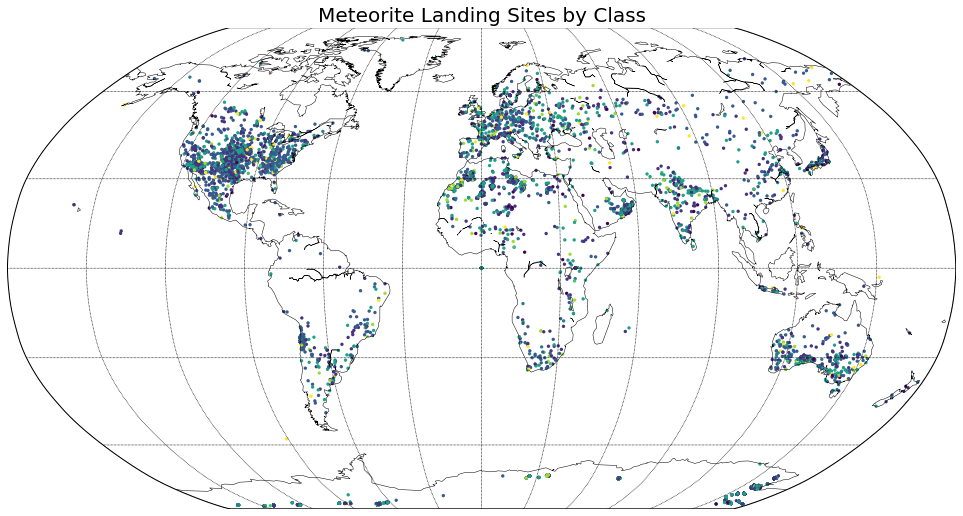

In [6]:
figure = plt.figure(figsize=(17,12))

Map_Plot = Basemap(projection='robin',lon_0=0,resolution='c')
Map_Plot.drawmapboundary(fill_color="w")
Map_Plot.drawcoastlines(linewidth=0.5)
Map_Plot.drawmeridians(range(0, 360, 30),linewidth=0.7)
Map_Plot.drawparallels([-60,-30,0.0,30,60],linewidth=0.7)
lon,lat = Map_Plot(df["Long"],df["Lat"])
Map_Plot.scatter(lon,lat,marker=".",s=45, c=df["num_class"], alpha=1,edgecolor="None")

plt.title("Meteorite Landing Sites by Class", fontsize=20)

## Feature Exploration

### Population Density

In [7]:
pop = pd.read_csv('worldcities.csv')
pop.rename({"lng": "Long", "lat": "Lat"}, axis=1, inplace=True)
pop = pop[['Lat','Long','population']].copy()

In [8]:
pop.dropna(subset = ['population'], inplace = True)
count_nan = pop.isnull().sum()
print(count_nan[count_nan > 0])

Series([], dtype: int64)


Text(0.5, 1.0, 'Meteorites(purple) vs Population(red)')

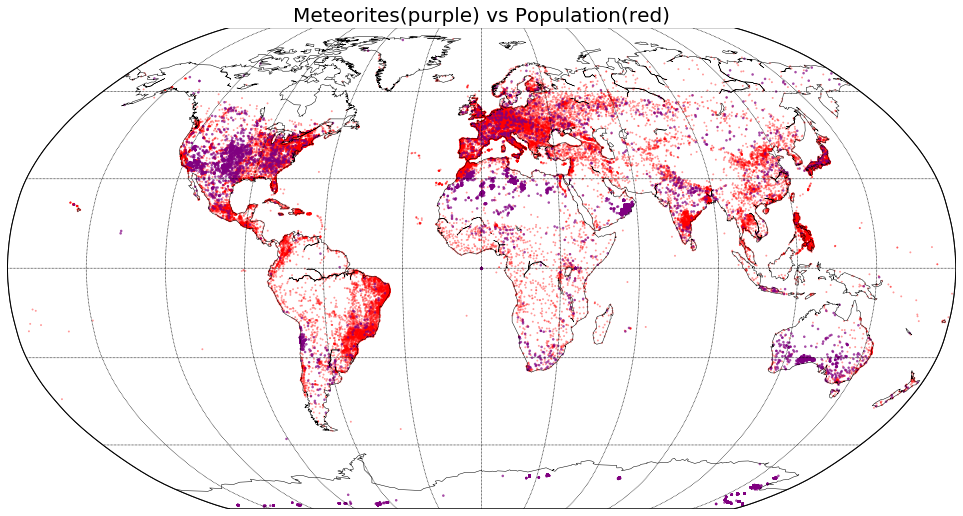

In [9]:
figure = plt.figure(figsize=(17,12))

m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawmapboundary(fill_color="w")
m.drawcoastlines(linewidth=0.5)
m.drawmeridians(range(0, 360, 30),linewidth=0.7)
m.drawparallels([-60,-30,0.0,30,60],linewidth=0.7)
lon,lat = m(pop["Long"],pop["Lat"])
m.scatter(lon,lat,marker=".",s=15,color = 'r',alpha=0.40,edgecolor="None")
lon,lat = Map_Plot(df["Long"],df["Lat"])
Map_Plot.scatter(lon,lat,marker=".",s=26,color = 'purple',alpha=0.70,edgecolor="None")
plt.title("Meteorites(purple) vs Population(red)", fontsize=20)

### Global Precipitation

In [10]:
### Global Precipitation Map
precip = pd.read_csv('precipitation_clean.csv')
precip.columns = ["Long", "Lat", "Precipitation"]
precip = precip[precip["Precipitation"]!=-99999.99]

In [11]:
### Adding Precipitation to locations in Antarctica Map
df_antartica = df[df["Lat"]<-60]
df_antartica = df_antartica[["Long","Lat"]]
df_antartica['Precipitation'] = 5

#df_antartica.rename({"reclong": "Long", "reclat": "Lat"}, axis=1, inplace=True)
frames = [precip, df_antartica]
precip = pd.concat(frames)


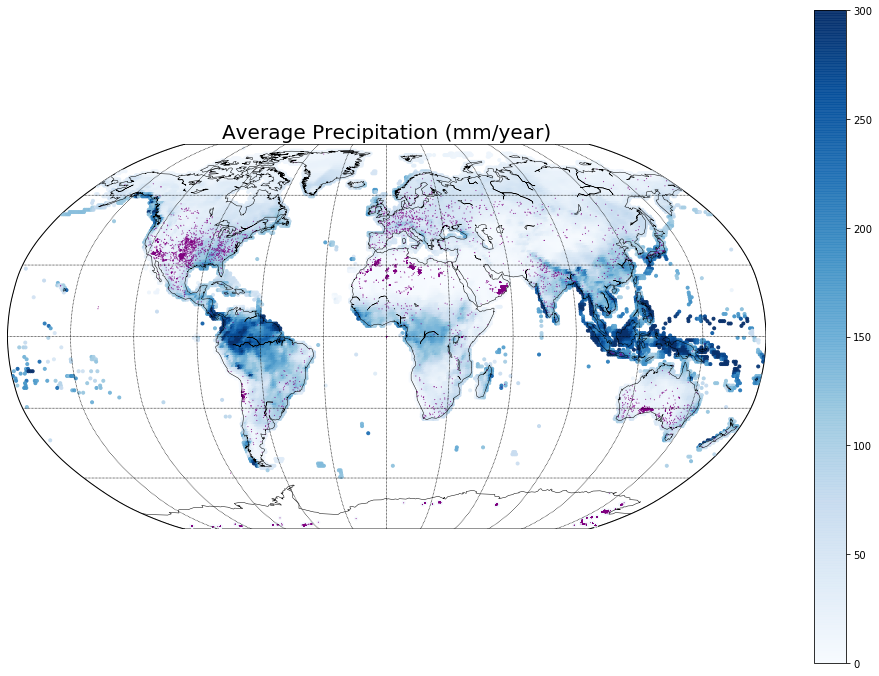

In [12]:
figure = plt.figure(figsize=(17,12))

Map_Plot = Basemap(projection='robin',lon_0=0,resolution='c')
Map_Plot.drawmapboundary(fill_color="w")
Map_Plot.drawcoastlines(linewidth=0.5)
Map_Plot.drawmeridians(range(0, 360, 30),linewidth=0.7)
Map_Plot.drawparallels([-60,-30,0.0,30,60],linewidth=0.7)
lon,lat = Map_Plot(precip["Long"],precip["Lat"])
color = precip["Precipitation"].to_numpy()

Map_Plot.scatter(lon,lat,marker=".",c=color,alpha=0.95,cmap='Blues')
plt.title("Average Precipitation (mm/year)", fontsize=20)
plt.colorbar()
plt.clim(0,300)
lon,lat = Map_Plot(df["Long"],df["Lat"])
Map_Plot.scatter(lon,lat,marker=".",s=5,color = 'purple',alpha=0.80,edgecolor="None")

### Global Topography

In [13]:
topo = genfromtxt('topography.csv', delimiter=',')
x=np.arange(361)
y=np.arange(181)
dff = pd.DataFrame(topo, columns=x, index=y)
dff = dff.stack().reset_index(name="values")
df_antartica.rename({"level_0": "Lat", "level_1": "Long", "values": "Topography"}, axis=1, inplace=True)
dff.columns = ["Lat", "Long", "Topography"]
dff["Lat"] = (dff["Lat"]-90)*-1
dff["Lat"] = dff["Lat"].astype(float)
dff["Long"] = dff["Long"].astype(float)

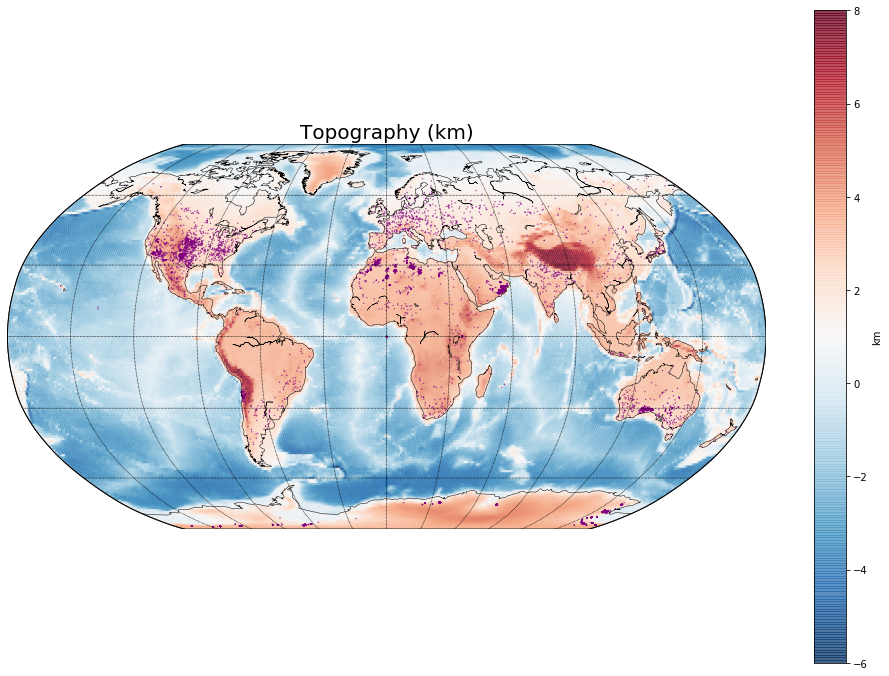

In [14]:
figure = plt.figure(figsize=(17,12))

m = Basemap(projection='robin',lon_0=0,resolution='c')
m.drawmapboundary(fill_color="w")
m.drawcoastlines(linewidth=0.5)
m.drawmeridians(range(0, 360, 30),linewidth=0.7)
m.drawparallels([-60,-30,0.0,30,60],linewidth=0.7)
lon,lat = m(dff["Long"],dff["Lat"])
color = dff["Topography"].to_numpy()
orig_RdBu=plt.cm.get_cmap('RdBu')
reversed_RdBu = orig_RdBu.reversed()

m.scatter(lon,lat,marker=".",c = color,alpha=0.75,edgecolor="None",cmap=reversed_RdBu)
plt.title("Topography (km)", fontsize=20)
colorbar = plt.colorbar()
plt.clim(-6,8)
colorbar.set_label('km', rotation=90)
#lon,lat = Map_Plot(df["reclong"],df["reclat"])
#color = dff["Topography"].to_numpy()
#Map_Plot.scatter(lon,lat,marker=".",color = color,alpha=0.50,edgecolor="None")
#plt.title("Meteorites(blue) vs Population(red)")
lon,lat = Map_Plot(df["Long"],df["Lat"])
Map_Plot.scatter(lon,lat,marker=".",s=8,color = 'purple',alpha=0.70,edgecolor="None")

### Join These Features to the Meteorite DataFrame

In [15]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Long, df.Lat))
gdff = gpd.GeoDataFrame(dff, geometry=gpd.points_from_xy(dff.Long, dff.Lat))
topo = gdff[['geometry','Topography']].copy()
gprecip = gpd.GeoDataFrame(precip, geometry=gpd.points_from_xy(precip.Long, precip.Lat))
gprecip = gprecip[['geometry','Precipitation']].copy()

def ckdnearest(gdA, gdB):

    nA = np.array(list(gdA.geometry.apply(lambda x: (x.x, x.y))))
    nB = np.array(list(gdB.geometry.apply(lambda x: (x.x, x.y))))
    btree = cKDTree(nB)
    dist, idx = btree.query(nA, k=1)
    gdB_nearest = gdB.iloc[idx].drop(columns="geometry").reset_index(drop=True)
    gdf = pd.concat(
        [
            gdA.reset_index(drop=True),
            gdB_nearest,
            pd.Series(dist/1000, name='dist') # Distance in km
        ], 
        axis=1)

    return gdf

gdf_new = ckdnearest(gdf, topo)
del gdf_new["dist"]
gdf_new2 = ckdnearest(gdf_new, gprecip)
del gdf_new2["dist"]
gdf_new2

gpd_pop = gpd.GeoDataFrame(pop, geometry=gpd.points_from_xy(pop.Long, pop.Lat)).set_crs('EPSG:4326').to_crs('EPSG:3857')
gpd_pop = gpd_pop[["geometry","population"]].copy()

gdf_new2_m = gdf_new2.copy()
del gdf_new2_m["geometry"]
gdf_new2_mm = gpd.GeoDataFrame(gdf_new2_m, geometry=gpd.points_from_xy(gdf_new2_m.Long, gdf_new2_m.Lat)).set_crs('EPSG:4326').to_crs('EPSG:3857')

gdf_complete = ckdnearest(gdf_new2_mm, gpd_pop)
del gdf_complete["GeoLocation"]
gdf_complete.rename({"dist": "pop_dist"}, axis=1, inplace=True)
gdf_complete

gpd_topo = topo.set_crs('EPSG:4326').to_crs('EPSG:3857')
gpd_topo = gpd_topo[['geometry','Topography']].copy()
gpd_topo.rename({"Topography": "topo"}, axis=1, inplace=True)

gpd_topo = gpd_topo[gpd_topo["topo"]<0]
gdf_complete = ckdnearest(gdf_complete, gpd_topo)
gdf_complete.rename({"dist": "ocean_dist"}, axis=1, inplace=True)


## Visualization

### Class Distribution and downsampling

In [16]:
print("CLASS\n")
print(gdf_complete["recclass"].value_counts())
print("CLASS Number\n")
print(gdf_complete["num_class"].value_counts())

CLASS

HOC     15874
LOC     12895
LLOC     4821
PALM     1477
CC       1265
IM       1073
OC        494
SIM       214
Name: recclass, dtype: int64
CLASS Number

1    15874
4    12895
3     4821
6     1477
0     1265
2     1073
5      494
7      214
Name: num_class, dtype: int64


/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


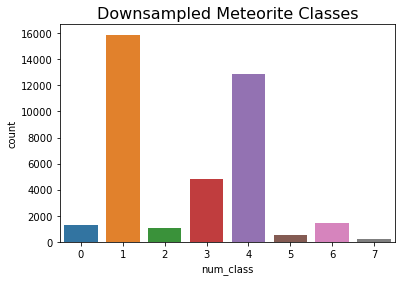

In [17]:
sb.countplot('num_class', data=gdf_complete)
plt.title('Downsampled Meteorite Classes', fontsize=16)
plt.show()

In [18]:
gdf_complete["fall"] = label_encoder.fit_transform(gdf_complete["fall"])
gdf_complete.head()

,name,id,nametype,recclass,mass,fall,year,Lat,Long,num_class,Topography,Precipitation,geometry,population,pop_dist,topo,ocean_dist
0,Aachen,1,Valid,LOC,21.0,0,1880.0,50.77500,6.08333,4,1.71570,68.94,POINT (677193.198 6581589.919),248960.0,0.217629,-0.13384,1273.712240
1,Aarhus,2,Valid,HOC,720.0,0,1951.0,56.18333,10.23333,1,1.42950,52.16,POINT (1139169.085 7594998.375),237551.0,5.800393,-0.10793,1822.706771
2,Abee,6,Valid,OC,107000.0,0,1952.0,54.21667,-113.00000,5,1.51580,27.23,POINT (-12579102.460 7211298.260),5101.0,95.534501,-0.93748,1910.139516
3,Acapulco,10,Valid,PALM,1914.0,0,1976.0,16.88333,-99.90000,6,3.40710,135.26,POINT (-11120817.130 1907248.183),673478.0,3.010439,-1.32590,103.127986
4,Achiras,370,Valid,LOC,780.0,0,1902.0,-33.16667,-64.95000,4,-0.83829,70.73,POINT (-7230200.927 -3917447.572),158298.0,67.287556,-0.66405,887.257658


/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


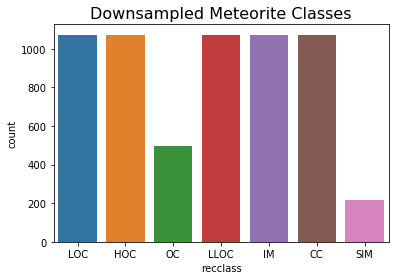

In [19]:
data = gdf_complete.sample(frac=1)
#'LOC', 'HOC', 'OC', 'PALM', 'LLOC', 'IM', 'CC', 'SIM'
#Downsample Non-fraud data to the size of fraud counts(492)
SIM = data.loc[data['recclass'] == "SIM"]
OC = data.loc[data['recclass'] == "OC"]
IM = data.loc[data['recclass'] == "IM"]
PALM = data.loc[data['recclass'] == "PALM"][:len(IM)]
CC = data.loc[data['recclass'] == "CC"][:len(IM)]
LOC = data.loc[data['recclass'] == "LOC"][:len(IM)]
LLOC = data.loc[data['recclass'] == "LLOC"][:len(IM)]
HOC= data.loc[data['recclass'] == "HOC"][:len(IM)]

#'LOC', 'HOC', 'OC', 'PALM', 'LLOC', 'IM', 'CC', 'SIM'
gdf_complete2 = pd.concat([LOC,HOC,OC,LLOC,IM,CC,SIM])
sb.countplot('recclass', data=gdf_complete2)
plt.title('Downsampled Meteorite Classes', fontsize=16)
plt.show()

### Correlations

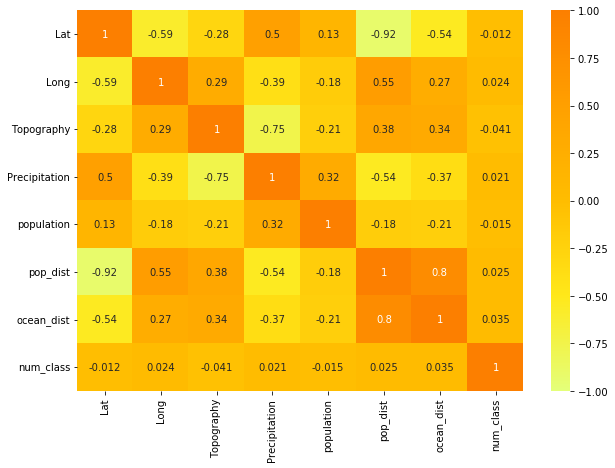

In [20]:
plt.figure(figsize = (10,7))
corr = gdf_complete[['Lat', 'Long','Topography','Precipitation', 'population','pop_dist','ocean_dist','num_class']].corr()
sb.heatmap(corr, cmap = 'Wistia', vmin=-1, vmax=1,annot= True)
plt.show(sb)

## Model

In [21]:

from sklearn.model_selection import train_test_split

############ Split to Test and Train ###############

X_final = gdf_complete2[['Lat', 'Long','Topography','Precipitation', 'population','pop_dist','ocean_dist']].copy()
#define y as being the "charges column" from the original dataset
y_final = gdf_complete2[['num_class']].copy()

#Test train split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.2, random_state = 0 )


In [22]:

#################### Feature Scaling ########################
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(float))
X_test= s_scaler.transform(X_test.astype(float))


In [23]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from statistics import mean
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "Perceptron": Perceptron()
}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", 
          round(training_score.mean(), 2) * 100, "% accuracy score")

/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

Classifiers:  LogisticRegression Has a training score of 37.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 44.0 % accuracy score


/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d ar

Classifiers:  SVC Has a training score of 41.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 42.0 % accuracy score


/var/folders/7l/_d7_56ts4p92bz2zmh89wzyw0000gn/T/ipykernel_51641/2169560281.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarn

Classifiers:  RandomForestClassifier Has a training score of 47.0 % accuracy score
Classifiers:  Perceptron Has a training score of 22.0 % accuracy score


/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/rudgerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

In [40]:
#fit model
forest = RandomForestClassifier(n_estimators=1000,
                     max_depth=10,
                     min_samples_split=2,
                     min_samples_leaf= 2,
                     bootstrap=True)

forest.fit(X_train,y_train.values.ravel())
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

#print score
print('forest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))


forest train score 0.546, forest test score: 0.477


### Feature Importances

In [41]:
importance = pd.DataFrame({"Importance":forest.feature_importances_, "name": ['Lat', 'Long','Topography','Precipitation', 'population','pop_dist','ocean_dist']}).sort_values("Importance", ascending=False)
importance

,Importance,name
5,0.224960,pop_dist
1,0.192600,Long
0,0.176402,Lat
6,0.145223,ocean_dist
3,0.097503,Precipitation
2,0.092096,Topography
4,0.071216,population


### Confusion Matrix

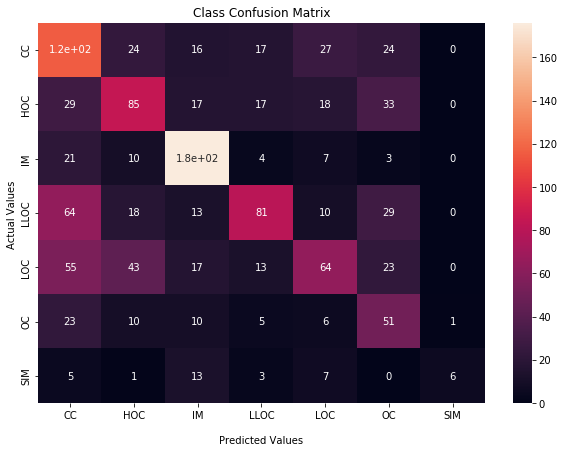

In [42]:
from sklearn.metrics import confusion_matrix 
plt.figure(figsize = (10,7))


cf_matrix = confusion_matrix(y_test,y_test_pred,labels=[0,1,2,3,4,5,7])
a = sb.heatmap(cf_matrix, annot=True)
a.set_title('Class Confusion Matrix');
a.set_xlabel('\nPredicted Values')
a.set_ylabel('Actual Values ');

a.xaxis.set_ticklabels(['CC','HOC','IM','LLOC','LOC','OC','SIM'])
a.yaxis.set_ticklabels(['CC','HOC','IM','LLOC','LOC','OC','SIM'])


plt.show()

### Model Results

The models seems to work best on Iron and Chondrite meteorites

### Random Forest Grid Search

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
#Function to print best hyperparamaters: 
def print_best_params(gd_model):
    param_dict = gd_model.best_estimator_.get_params()
    model_str = str(gd_model.estimator).split('(')[0]
    print("\n*** {} Best Parameters ***".format(model_str))
    for k in param_dict:
        print("{}: {}".format(k, param_dict[k]))
    print()
    
param_grid_dt = dict(min_samples_leaf=np.arange(9, 13, 1, int), 
                  max_depth = np.arange(4,7,1, int),
                  min_impurity_decrease = [0, 1, 2],
                 )


###Random Forest parameter grid###
param_grid_rf = dict(n_estimators=[100, 1000],
                     max_depth=[4, 10, 20, None],
                     min_samples_split=[2],
                     min_samples_leaf= np.arange(2, 4, 6),
                     bootstrap=[True, False])


forest = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=param_grid_rf, cv=5, verbose=3)

#fit model
forest.fit(X_train,y_train.values.ravel())


#print score
print('\n\nforest train score %.3f, forest test score: %.3f' % (
forest.score(X_train,y_train),
forest.score(X_test, y_test)))

print_best_params(forest)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END bootstrap=True, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.435 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.412 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.436 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.413 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.456 total time=   0.2s
[CV 1/5] END bootstrap=True, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.421 total time=   2.2s
[CV 2/5] END bootstrap=True, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.413 total time=   2.2s
[CV 3/

[CV 2/5] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.461 total time=   0.5s
[CV 3/5] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.475 total time=   0.5s
[CV 4/5] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.463 total time=   0.5s
[CV 5/5] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.455 total time=   0.5s
[CV 1/5] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.474 total time=   5.4s
[CV 2/5] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.461 total time=   5.3s
[CV 3/5] END bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=1000;, score=0.475 total time=   5.0s
[CV 4/5] END bootstrap=False, max_depth=20, min_samp